Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

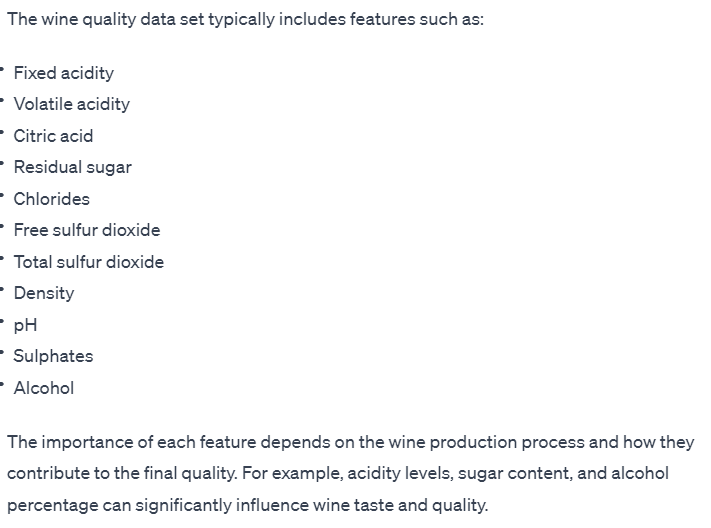 and quality.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

Imputation techniques like mean, median, or regression can be used to handle missing data. The choice depends on the nature of the missingness and the impact on the analysis. Advantages include preserving sample size, but disadvantages include introducing bias if not handled carefully.

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

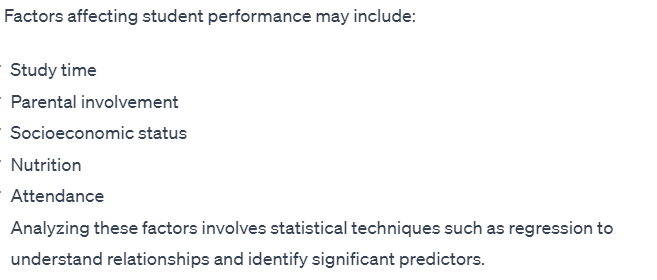

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Transformations might involve creating new features like:

Total study time ,
Parental involvement score ,
Socioeconomic status category

Feature selection can be based on correlation, importance scores, or domain knowledge.

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

Use histograms, box plots, and normality tests to identify non-normal features. Transformations like log or Box-Cox might be applied for normalization.

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

# Load Wine Quality dataset
wine_data = pd.read_csv('wine_quality.csv')

# EDA to identify feature distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(wine_data.columns[:-1]):
    plt.subplot(3, 4, i+1)
    wine_data[feature].hist(bins=30, edgecolor='black')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# Check normality using Shapiro-Wilk test
non_normal_features = []
for feature in wine_data.columns[:-1]:
    stat, p_value = shapiro(wine_data[feature])
    if p_value < 0.05:
        non_normal_features.append(feature)

print(f'Non-normal features: {non_normal_features}')

# Apply Box-Cox transformation to non-normal features
for feature in non_normal_features:
    wine_data[feature], _ = boxcox(wine_data[feature] + 1)

# Check transformed distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(non_normal_features):
    plt.subplot(3, 4, i+1)
    wine_data[feature].hist(bins=30, edgecolor='black')
    plt.title(f'Transformed {feature} Distribution')
plt.tight_layout()
plt.show()


Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

Apply PCA to reduce dimensionality. Use scree plots or cumulative explained variance to determine the minimum number of principal components.

from sklearn.decomposition import PCA

# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Determine the minimum number of components to explain 90% of variance
explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
min_components_90_variance = len(explained_variance_ratio_cumsum[explained_variance_ratio_cumsum >= 0.9])

print(f'Minimum number of components to explain 90% variance: {min_components_90_variance}')
